<img src="../images/galvanize-logo.png" alt="galvanize-logo" align="center" style="width: 200px;"/>

<hr />

# Assignment - Storytelling

In [ ]:
%%HTML

In [75]:
import re
import os
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 11
LARGE_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title


## The backstory


Let's imagine a fictional online education company called *Kalvanize*.  They have a team of talented data scientists and engineers that have been able to turn convert educational videos into dozens of other languages.  The video that a subscriber of this service clicks on is piped through cloud resources managed by Kalvanize and both the voice and the movement of the lips are modified to match the language the subscriber has selected.  The service even works for certain languages *on-demand*.  There are separate deep-learning models for the image and audio portions of the service, but the experience is seamless for the user.

Recently the management team has decided to expand its services to additional markets. The Singapore market demonstrated a strong initial adoption, with increasing revenue and traction from the subscribers in the first 4 months.  However, subscriptions & engagement have stagnated. The data shows that after about 4 months there is a major drop off in watch-time and subscribers are quickly dropping off the platform.

You are new to the data science team and management has tasked you with figuring this out.  There have been discussions about launching various marketing campaigns, modifying the pricing model, refining the product
and more, with the goal of driving the product growth in the new markets.  Ultimately the business opportunity here is to use these levers to improve engagement and sales. Inside the data there is a story to tell and your job is to pull it out.


## Part 1: data ingestion

The data team is busy so they did not have time to help much, but one of the team members cooked up a data ingestion script that was suppose to help you get started.  The user specific data you will need is stored in a data base and in another file there is some streaming data.  Have a look at the file `kalvanize-data-ingestor.py` and use it to get a staged csv file to begin your analysis.

In [1]:
## run the ingestor here

!python kalvanize-data-ingestor.py -d kalvanize-customers.db -s kalvanize-streams.csv

...successfully connected to db
... removed 7 duplicate rows in db data
... removed 1164 missing stream ids
done


In [6]:
ks = pd.read_csv("../data/kalvanize-staged.csv")

## Part 2: EDA - summarize the data

You are going to want to spend a little time getting to know the data.  Are there any missing values? How much data and what what types of variables are you working with etc.  Remember to use visuals here.

Data Set

In [91]:
ks.head(n=10)


,customer_id,is_subscriber,country,age,customer_name,subscriber_type,num_streams
0,1,1,united_states,21,Kasen Todd,aavail_premium,23
1,2,0,singapore,31,Ensley Garza,aavail_unlimited,12
2,3,0,united_states,22,Lillian Carey,aavail_premium,22
3,4,1,united_states,21,Beau Christensen,aavail_basic,19
4,5,1,singapore,22,Ernesto Gibson,aavail_premium,23
5,6,1,united_states,22,Deshawn Murray,aavail_premium,20
6,7,0,singapore,49,Daxton Tate,aavail_basic,18
7,8,1,united_states,47,Tenley Small,aavail_premium,20
8,9,0,united_states,22,Kyra Chase,aavail_premium,24
9,10,0,united_states,26,London Barber,aavail_basic,20


In [8]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1000 non-null   int64 
 1   is_subscriber    1000 non-null   int64 
 2   country          1000 non-null   object
 3   age              1000 non-null   int64 
 4   customer_name    1000 non-null   object
 5   subscriber_type  1000 non-null   object
 6   num_streams      1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


## Part 3: EDA - Quality Assurance

Implementation of checks for Quality Assurance

1. Remove any repeat customers based on customer_id
2. Remove stream data that do not have an associated stream_id
3. Check for missing values

In the interest of time.  This stage has already been done for you in the data ingestion script.  It is still a good practice to have a couple of quality assurance checks present in your code.

In [9]:
## your code here
ks.describe()

,customer_id,is_subscriber,age,num_streams
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,0.711000,25.418000,17.69500
std,288.819436,0.453525,13.364801,4.79802
min,1.000000,0.000000,-50.000000,1.00000
25%,250.750000,0.000000,21.000000,15.00000
50%,500.500000,1.000000,24.000000,19.00000
75%,750.250000,1.000000,31.000000,21.00000
max,1000.000000,1.000000,50.000000,29.00000


In [59]:
#no nulls on num_streams
# n unique values of customer_id = total number of rows
len(pd.unique(ks['customer_id']))

1000

In [60]:
#in real life, I wouldn't just *fix* this, because clearly the age source has a problem, but Adam said to do so...
ks.age = abs(ks.age)

In [61]:
ks.describe()

,customer_id,is_subscriber,age,num_streams
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,0.711000,27.316000,17.69500
std,288.819436,0.453525,8.855991,4.79802
min,1.000000,0.000000,14.000000,1.00000
25%,250.750000,0.000000,21.000000,15.00000
50%,500.500000,1.000000,24.000000,19.00000
75%,750.250000,1.000000,33.000000,21.00000
max,1000.000000,1.000000,50.000000,29.00000


## Part 4: EDA - Tell the story


   >Goal: communicate EDA findings in an upcoming meeting with product managers and team leads.  
   You should be able to explain using visualizations what factor(s) are the likely 
   cause of the market situation in Singapore.

Recall that you are trying to identify the factors that contribute to the unique market situation in Singapore.  Singapore has a higher rate of churn than the other markets and there is something in the data that, once uncovered, will allow you to make a testable hypothesis.  

In practice your deliverable would have 

1. Descriptions of the data along with a summary of the business opportunity.  
2. The story details through the lens of an investigation  
3. Some discussion and suggestions about next steps in the process

In this part let's focus on the story details and the investigation.

HINT: You can use hypothesis testing and or visualization to figure out what is going on.  There is a difference between the two markets and there are several ways to tell the story.

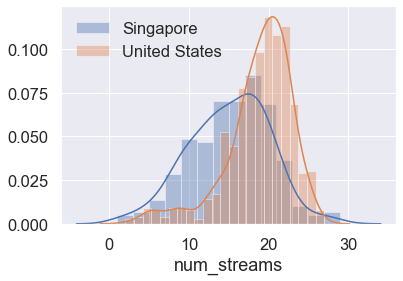

In [57]:
sns.distplot(ks.num_streams[ks.country=='singapore'],label="Singapore")
sns.distplot(ks.num_streams[ks.country=='united_states'],label="United States")
plt.legend()
#Singapore market looks to be streaming less on average, and in particular to lack the peak users with 18-24 streams seen in the United States.

In [ ]:
sns.distplot(ks.age[ks.country=='singapore'],label="Singapore")
sns.distplot(ks.age[ks.country=='united_states'],label="United States")
plt.legend()

In [77]:
def make_bar(): 
    pd.pivot_table(ks, index='country',columns='subscriber_type',values='customer_id',aggfunc='count').plot(kind='bar');



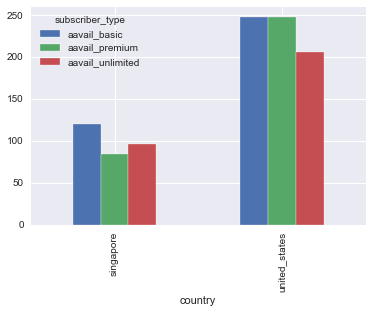

In [78]:
make_bar()
# While the distribution of subscription types is fairly similar in Singapore...

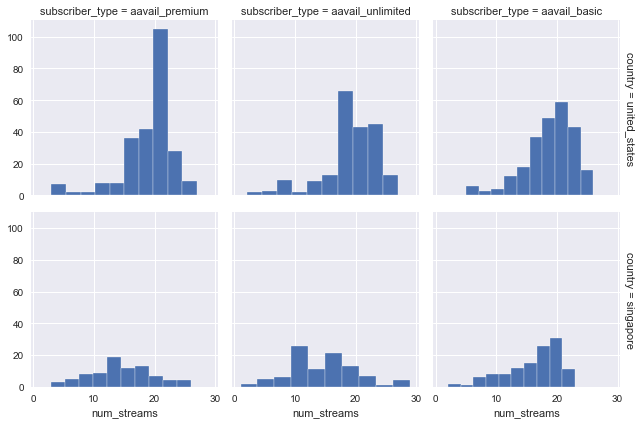

In [85]:
g = sns.FacetGrid(ks, row="country", col="subscriber_type", margin_titles=True)
g.map(plt.hist, "num_streams")
# Breaking it down by subscriber type, 
#   'basic' subscribers' usage patterns look similar in Singapore
#   But Premium and Unlimited users in Singapore were less likely to be heavy users

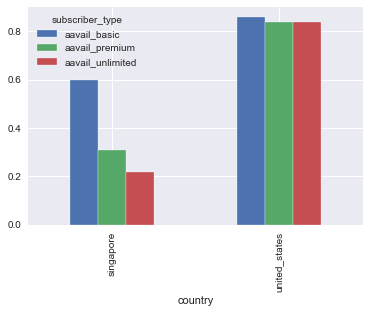

In [87]:
pd.pivot_table(ks, index='country',columns='subscriber_type',values='is_subscriber',aggfunc='mean').plot(kind='bar')
# and in fact, the worst churn was among those premium and unlimited users

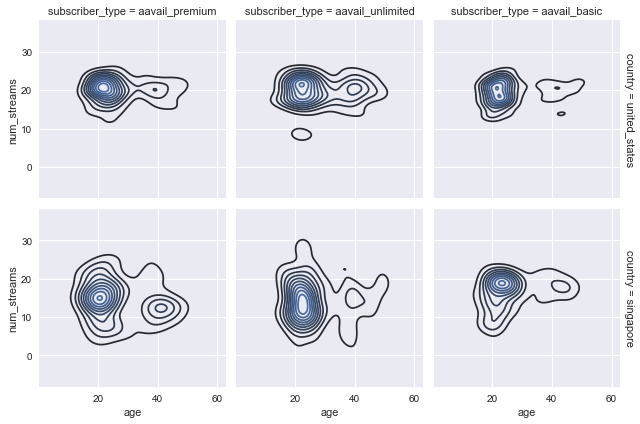

In [90]:
# I would not show this figure to most (any?) of our execs, but found it helpful myself:
kdegrid = sns.FacetGrid(ks,row="country",col="subscriber_type",margin_titles=True)
kdegrid.map(sns.kdeplot, "age","num_streams")

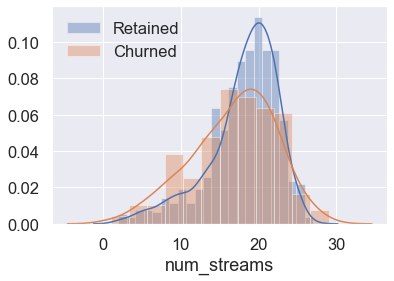

In [74]:
## Stuff below not part of the storytelling, just some other things I looked at.
sns.distplot(ks.num_streams[ks.is_subscriber==1],label="Retained")
sns.distplot(ks.num_streams[ks.is_subscriber==0],label="Churned")
plt.legend()

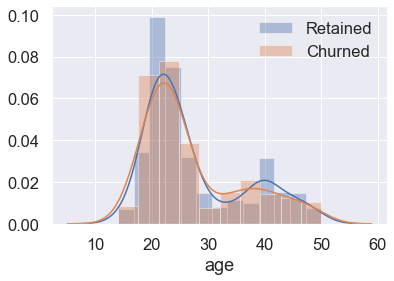

In [72]:
sns.distplot(ks.age[ks.is_subscriber==1],label="Retained")
sns.distplot(ks.age[ks.is_subscriber==0],label="Churned")
plt.legend()

## Extra Credit

Adopt the [plotly time-series tutorial](https://plotly.com/python/time-series/) to monitor the number of streams each day. 